## Import helpers and packages

In [216]:
import pandas as pd
from autoc import DataExploration, PreProcessor, NaImputer
from autoc.utils.getdata import get_dataset
import numpy as np

# skicit learn 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score, auc, classification_report

# matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Playing with titanic data 

Two approaches : 
* Simulate missing data and look if we can impute them correctly using machine learning algo
* Impute the real ones and look if it is improving performance on the prediction 

In [217]:
titanic = get_dataset("titanic")

In [218]:
titanic.who.dtype.kind == 'O'

True

In [219]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [220]:
exploration_titanic = DataExploration(titanic)

In [221]:
exploration_titanic.print_infos() # there is duplicates here because no id, interesting !

{'duplicated_rows': {'action': 'delete',
                     'comment': 'You should delete this rows with df.drop_duplicates()',
                     'level': 'ERROR',
                     'value': Int64Index([ 47,  76,  77,  87,  95, 101, 121, 133, 173, 196,
            ...
            838, 844, 846, 859, 863, 870, 877, 878, 884, 886],
           dtype='int64', length=107)}}


In [222]:
exploration_titanic.nacolcount()

,Nanumber,Napercentage
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,0.198653
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.002245
class,0,0.000000
who,0,0.000000


In [223]:
exploration_titanic.structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer,string_length
survived,int64,numeric,0,0.000000,2,False,False,False,integer,NaN
pclass,int64,numeric,0,0.000000,3,False,False,False,integer,NaN
sex,object,factor,0,0.000000,2,False,False,False,string,6
age,float64,numeric,177,0.198653,88,False,False,False,floating,NaN
sibsp,int64,numeric,0,0.000000,7,False,False,False,integer,NaN
parch,int64,numeric,0,0.000000,7,False,False,False,integer,NaN
fare,float64,numeric,0,0.000000,248,False,False,False,floating,NaN
embarked,object,factor,2,0.002245,3,False,False,False,mixed,1
class,object,factor,0,0.000000,3,False,False,False,string,6
who,object,factor,0,0.000000,3,False,False,False,string,5


In [224]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [225]:
titanic.loc[titanic.age.isnull(),:].head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


### Preprocessing data 

In [226]:
preprocessor = PreProcessor(titanic)

In [227]:
preprocessor.infer_subtypes()

{'adult_male': 'binary',
 'age': None,
 'alive': 'binary',
 'alone': 'binary',
 'class': 'text_categorical',
 'deck': 'text_categorical',
 'embark_town': 'text_categorical',
 'embarked': 'text_categorical',
 'fare': None,
 'parch': 'ordinal',
 'pclass': 'ordinal',
 'sex': 'binary',
 'sibsp': 'ordinal',
 'survived': 'binary',
 'who': 'text_categorical'}

In [228]:
titanic = titanic.drop('alive', axis = 1)

### Transform everything to numeric variables for skicit learn model 

The dataset is not clean enough to be directly transformed as a numpy array and used for ml with skicit learn 
* The target variable (alive) is not a a integer dummy variable (0 or 1) 
* The values are heterogeneous (string labels for categories, integers and floating point numbers). Numpy array for skicit learn only supports integers and floating point numbers.
* Some observations are missing (np.nan)

In [822]:
features_full = pd.concat([titanic.loc[:, ['fare', 'age', 'pclass', 'sibsp', 'parch']],
                      pd.get_dummies(titanic['sex'], prefix='sex'),
                      pd.get_dummies(titanic['who'], prefix='who'),
                      pd.get_dummies(titanic['alone'], prefix='alone'),
                      pd.get_dummies(titanic['embarked'], prefix='embarked')],
                     axis=1)

In [778]:
features = pd.concat([titanic[['fare', 'age', 'pclass']],
                      pd.get_dummies(titanic['sex'], prefix='sex'),
                      pd.get_dummies(titanic['who'], prefix='who'),
                      pd.get_dummies(titanic['embarked'], prefix='embarked')],
                     axis=1)

In [779]:
target = titanic.survived

#### Simple Model to understand variable importances 

##### Prepare data

In [709]:
# Impute missing values 
imp = NaImputer(features_full)
features_full = imp.basic_naimputation(['age']) # this is still a pandas Dataframe but imputed 
target = titanic.survived

[]


In [710]:
# Creating test train 
features_train, features_test, target_train, target_test = train_test_split(
    features_full.values, target.values, test_size=0.25, random_state=0)

##### Logistic Regression 

In [711]:
logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)
target_pred = logreg.predict(features_test)


feature_names = features_full.columns
print("Accuracy : {}".format(accuracy_score(target_test, target_pred)))
weights = logreg.coef_.flatten()
dict_weights = {k:v for k,v in zip(feature_names, weights)}

Accuracy : 0.811659192825


In [712]:
def plot_simple_imp(imp, features_names,sort = True, absolute=False):
    serie = pd.Series(index=feature_names, data=imp)
    if absolute : 
        serie = np.abs(serie)
    if sort :
        serie.sort_values(inplace=True, ascending=False)
    serie.plot(kind='barh')

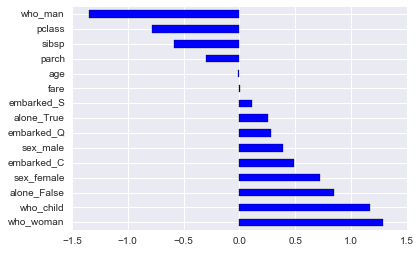

In [713]:
plot_simple_imp(weights, feature_names)

In [715]:
# Looking at weights 
feature_names = features_full.columns

def plot_abs_weights(coeff_arr, features_name, title=None,legend_size=12,figsize=(15,7)):
    coeff_arr = np.abs(coeff_arr)# take absolute value
    coeff_arr.sort()
    plt.figure(figsize=figsize)
    plt.barh(range(len(feature_names)), coeff_arr)
    plt.yticks(range(len(feature_names)), feature_names, size=legend_size)
    if title:
        plt.title(title)


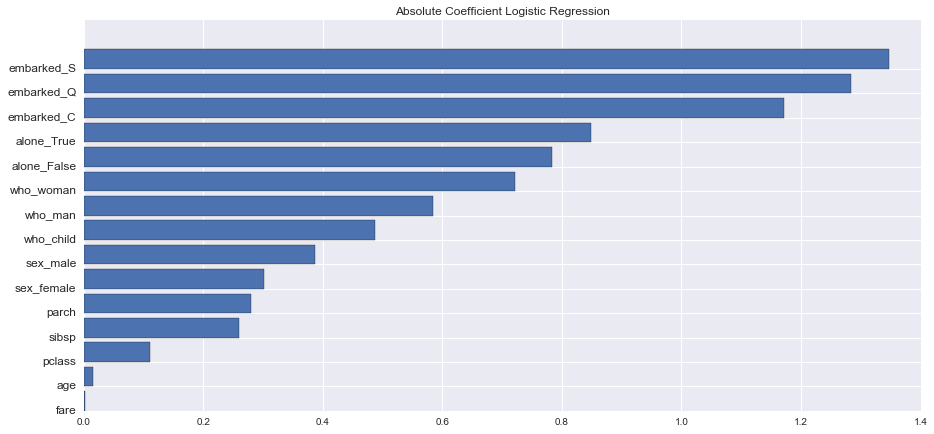

In [716]:
plot_abs_weights(logreg.coef_.ravel(), feature_names, title="Absolute Coefficient Logistic Regression")

##### Random Forest 

In [717]:
rf_full = RandomForestClassifier(n_estimators=500)
rf_full.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [718]:
rf_full.score(features_test, target_test)

0.820627802690583

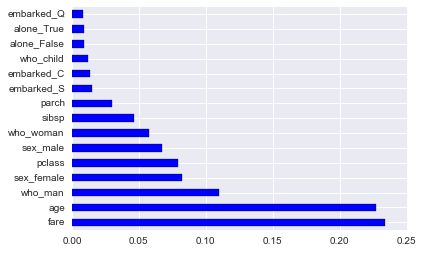

In [719]:
plot_simple_imp(rf_full.feature_importances_, feature_names)

In [720]:
target_predicted_proba = rf.predict_proba(features_test_rm)

### Studying simple imputation technique for accuracy performance 

Here we are trying to predict who survives using with the variable age having natural missing values  

* Deletion of row containing missing values 
* Deletion of col containig missing values 
* Imputation of missing values with median 
* Imputation of missing values with -1 


In [756]:
def rf_cv(features, target,random_state=1, n_estimators=200,scoring='accuracy',n_jobs=4):
    """ Print scores of a random forest cross validation  """
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    scores = cross_val_score(rf, features, target, cv=4,scoring=scoring,n_jobs=4)
    print("Random Forest CV scores:")
    print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(scores.min(), scores.mean(), scores.max()))
    return scores

def logreg_cv(features, target, scoring='accuracy',n_jobs=4):
    """ Print scores of a  forest cross validation  """
    logreg = LogisticRegression(C=1)
    scores = cross_val_score(logreg, features, target, cv=4,scoring=scoring,n_jobs=4)
    print("Logistic Regression CV scores:")
    print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(scores.min(), scores.mean(), scores.max()))
    return scores
    

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

#### Row Deletion strategy

In [780]:
# selecting index and transforming into numpy array 
index_missing_age = features.age.isnull()
features_rm_a, target_rm_a = features.loc[~index_missing_age, :].values, target[~index_missing_age].values

In [781]:
features_rm_a.shape

(714, 11)

In [782]:
rf_cv(features_rm_a, target_rm_a, scoring='accuracy')

Random Forest CV scores:
min: 0.726, mean: 0.784, max: 0.816


array([ 0.72625698,  0.81564246,  0.80898876,  0.78651685])

In [783]:
features_train_rm, features_test_rm, target_train_rm, target_test_rm = train_test_split(
    features_rm_a, target_rm_a, test_size=0.25, random_state=0)

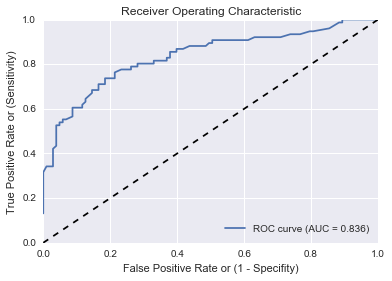

In [784]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(features_train_rm, target_train_rm)
target_predicted_proba = rf.predict_proba(features_test_rm)
plot_roc_curve(target_test_rm, target_predicted_proba)

In [786]:
rf_cv(features_rm_a, target_rm_a,random_state=0, scoring='roc_auc')

Random Forest CV scores:
min: 0.812, mean: 0.849, max: 0.865


array([ 0.81209615,  0.85655208,  0.86130765,  0.86458333])

#### Col Deletion strategy

In [787]:
# selecting index and transforming into numpy array 
features_cm_a, target_cm_a = features.drop('age', axis =1).values, target.values

In [788]:
features_cm_a.shape

(891, 10)

In [789]:
rf_cv(features_cm_a, target_cm_a, scoring="accuracy")

Random Forest CV scores:
min: 0.759, mean: 0.809, max: 0.833


array([ 0.75892857,  0.8206278 ,  0.83333333,  0.82432432])

In [790]:
features_train_cm, features_test_cm, target_train_cm, target_test_cm = train_test_split(
    features_cm_a, target_cm_a, test_size=0.25, random_state=0)

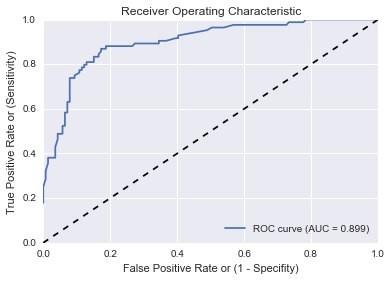

In [795]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(features_train_cm, target_train_cm)
target_predicted_proba = rf.predict_proba(features_test_cm)
plot_roc_curve(target_test_cm, target_predicted_proba)

In [742]:
rf_cv(features_cm_a, target_cm_a, scoring="roc_auc")

Random Forest CV scores:
min: 0.808, mean: 0.850, max: 0.880


array([ 0.80801314,  0.87960448,  0.8540146 ,  0.85702018])

####  Median Imputation strategy

In [767]:
# selecting index and transforming into numpy array 

features_imp = features.copy()
features.shape

(891, 11)

In [734]:
# features_imp.loc[:,'is_na_age'] =features_imp.age.isnull().astype(int)
# imp = NaImputer(features) # creating our imputer instance
# features_imp = imp.basic_naimputation(columns_to_process=['age'])

['age']


In [769]:
features_imp = features.fillna(-1)

In [770]:
features_imp_a, target_imp_a = features_imp.values, target.values

In [775]:
rf_cv(features_imp_a, target_imp_a, scoring='accuracy')

Random Forest CV scores:
min: 0.759, mean: 0.805, max: 0.834


array([ 0.75892857,  0.83408072,  0.81981982,  0.80630631])

In [772]:
features_train_imp, features_test_imp, target_train_imp, target_test_imp = train_test_split(
    features_imp_a, target_imp_a, test_size=0.25, random_state=0)

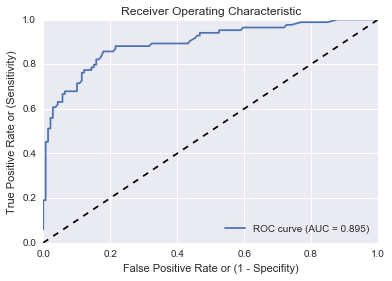

In [799]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(features_train_imp, target_train_imp)
target_predicted_proba = rf.predict_proba(features_test_imp)
plot_roc_curve(target_test_imp, target_predicted_proba)

In [617]:
rf_cv(features_imp_a, target_imp_a, scoring='roc_auc')

Random Forest CV scores:
min: 0.790, mean: 0.822, max: 0.842


array([ 0.79010785,  0.83029197,  0.82528982,  0.84173465])

In [486]:
rf.feature_importances_

array([ 0.13884938,  0.40166131,  0.1038943 ,  0.09721778,  0.0140686 ,
        0.15693177,  0.04569262,  0.01395545,  0.01005908,  0.01766972])

### Simulating missing values in a column and see imputation performance  

The purpose of this section is to simulate missing values in a important variable like .. and see the decrease of performance and the ability to correcly impute the missing value 

* We start using the features_full dataset 

In [618]:
# constructing features 
features_imp = pd.concat([titanic[['pclass']],
                      pd.get_dummies(titanic['sex'], prefix='sex'),
                      pd.get_dummies(titanic['who'], prefix='who')],axis=1)

In [619]:
features_imp.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [620]:
pct_na_toinsert = 0.5
nb_na_toinsert = int(pct_na_toinsert * len(features_full_imp))
index_na_toinsert = np.random.choice(range(len(features_full_imp)),nb_na_toinsert, replace=False)
index_na_toinsert
print("We are inserting {} missing values".format(len(index_na_toinsert)))

We are inserting 445 missing values


In [621]:
features_imp.loc[index_na_toinsert, 'pclass'] = np.nan

In [622]:
DataExploration(features_imp).nacolcount()

,Nanumber,Napercentage
pclass,445,0.499439
sex_female,0,0.000000
sex_male,0,0.000000
who_child,0,0.000000
who_man,0,0.000000
who_woman,0,0.000000


#### Imputing with most common value 

In [623]:
# imputing by most common value
imp_f = NaImputer(features_imp)
features_imp.pclass = imp_f.fillna_serie(colname='pclass')

['pclass']


In [624]:
DataExploration(features_imp).nacolcount()

,Nanumber,Napercentage
pclass,0,0
sex_female,0,0
sex_male,0,0
who_child,0,0
who_man,0,0
who_woman,0,0


#### Comparing simulated model and raw model 

In [626]:
#scores_imp = logreg_cv(features_imp.drop('pclass',1), target)

In [830]:
def insert_na(features_full=features_imp,target=target,index=False, col_to_simulate='pclass', pct_na_toinsert=0.2):
    """ Returns dataset with a certain pct of na injected in one colum """
    nb_na_toinsert = int(pct_na_toinsert * len(features_full))
    index_na_toinsert = np.random.choice(range(len(features_full)),nb_na_toinsert, replace=False)
    print("We are inserting {} missing values".format(len(index_na_toinsert)))
    features_full_imp = features_full.copy()
    if index :
        return index_na_toinsert
    else:
        features_full_imp.loc[index_na_toinsert, col_to_simulate] = np.nan
        return features_full_imp

def score_rf_sim(features_full=features_imp,target=target,
                 col_to_simulate='pclass', pct_na_toinsert=0.2, n_repeat=10, *args, **kwargs):
    """ Inserting a percentage of missing values on a variable and look influence on performance 
    with a random forest model """
    features_full_imp = insert_na(features_full,target=target,
                                  col_to_simulate=col_to_simulate, pct_na_toinsert=pct_na_toinsert)
    imp_f = NaImputer(features_full_imp)
    features_full_imp.loc[:,col_to_simulate] = imp_f.fillna_serie(colname=col_to_simulate)
    # repeated cross validation 
#     score_rcv = 0
#     for i in range(n_repeat):
#         score_rcv += logreg_cv(features_full_imp, target,*args, **kwargs).mean()
    return logreg_cv(features_full_imp, target).mean()

In [810]:
score_rf_sim(col_to_simulate='pclass')

We are inserting 178 missing values
['pclass']
Logistic Regression CV scores:
min: 0.757, mean: 0.780, max: 0.794


0.78000425453480393

In [811]:
accuracy_mean_pct_na = np.array([score_rf_sim(
            pct_na_toinsert=i,col_to_simulate='pclass') for i in np.linspace(0,0.98,10)])

We are inserting 0 missing values
[]
Logistic Regression CV scores:
min: 0.761, mean: 0.800, max: 0.816
We are inserting 97 missing values
['pclass']
Logistic Regression CV scores:
min: 0.757, mean: 0.785, max: 0.807
We are inserting 194 missing values
['pclass']
Logistic Regression CV scores:
min: 0.761, mean: 0.793, max: 0.816
We are inserting 291 missing values
['pclass']
Logistic Regression CV scores:
min: 0.748, mean: 0.782, max: 0.803
We are inserting 388 missing values
['pclass']
Logistic Regression CV scores:
min: 0.761, mean: 0.786, max: 0.812
We are inserting 485 missing values
['pclass']
Logistic Regression CV scores:
min: 0.768, mean: 0.787, max: 0.807
We are inserting 582 missing values
['pclass']
Logistic Regression CV scores:
min: 0.761, mean: 0.781, max: 0.789
We are inserting 679 missing values
['pclass']
Logistic Regression CV scores:
min: 0.761, mean: 0.783, max: 0.798
We are inserting 776 missing values
['pclass']
Logistic Regression CV scores:
min: 0.761, mean: 0.7

In [804]:
def sim_nmc(nmc=60,n_interval=5, *args, **kwargs):
    
    res = np.zeros(n_interval)
    for i in range(nmc):
        res +=  np.array([score_rf_sim(
            pct_na_toinsert=i, *args, **kwargs) for i in np.linspace(0,0.98,n_interval)])
    return res/nmc


In [805]:
test = sim_nmc(nmc=30, n_interval=5)

We are inserting 0 missing values
[]
Logistic Regression CV scores:
min: 0.761, mean: 0.800, max: 0.816
We are inserting 218 missing values
['pclass']
Logistic Regression CV scores:
min: 0.757, mean: 0.788, max: 0.812
We are inserting 436 missing values
['pclass']
Logistic Regression CV scores:
min: 0.766, mean: 0.791, max: 0.816
We are inserting 654 missing values
['pclass']
Logistic Regression CV scores:
min: 0.761, mean: 0.787, max: 0.807
We are inserting 873 missing values
['pclass']
Logistic Regression CV scores:
min: 0.757, mean: 0.781, max: 0.798
We are inserting 0 missing values
[]
Logistic Regression CV scores:
min: 0.761, mean: 0.800, max: 0.816
We are inserting 218 missing values
['pclass']
Logistic Regression CV scores:
min: 0.748, mean: 0.781, max: 0.807
We are inserting 436 missing values
['pclass']
Logistic Regression CV scores:
min: 0.757, mean: 0.788, max: 0.816
We are inserting 654 missing values
['pclass']
Logistic Regression CV scores:
min: 0.757, mean: 0.787, max: 

In [806]:
test

array([ 0.80017889,  0.78857214,  0.7875747 ,  0.78428784,  0.78155433])

In [807]:
np.linspace(0,0.98,5)

array([ 0.   ,  0.245,  0.49 ,  0.735,  0.98 ])

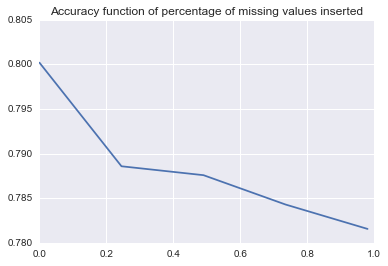

In [808]:
plt.plot(np.linspace(0,0.98,5), test)
plt.title('Accuracy function of percentage of missing values inserted')

### Trying to predict missing values

We start with all features to have better prediciton power

In [879]:
features_pred = features_full.copy().drop_duplicates()
features_pred = features_pred.drop('age', axis = 1)

In [880]:
index_na = insert_na(col_to_simulate='pclass', pct_na_toinsert=0.2, index=True)

We are inserting 178 missing values


In [881]:
index_na = features_pred.index.isin(index_na)

In [882]:
features_pred.head()

,fare,pclass,sibsp,parch,sex_female,sex_male,who_child,who_man,who_woman,alone_False,alone_True,embarked_C,embarked_Q,embarked_S
0,7.2500,3,1,0,0,1,0,1,0,1,0,0,0,1
1,71.2833,1,1,0,1,0,0,0,1,1,0,1,0,0
2,7.9250,3,0,0,1,0,0,0,1,0,1,0,0,1
3,53.1000,1,1,0,1,0,0,0,1,1,0,0,0,1
4,8.0500,3,0,0,0,1,0,1,0,0,1,0,0,1


In [883]:
target = features_pred.pclass
features_pred = features_pred.drop('pclass', axis = 1)

In [884]:
features_pred_train, target_pred_target = features_pred.loc[~index_na,:], target[~index_na]
features_pred_test, target_pred_test = features_pred.loc[index_na,:], target[index_na]


In [885]:
features_pred_train.shape

(604, 13)

In [890]:
features_pred_test.head()

,fare,sibsp,parch,sex_female,sex_male,who_child,who_man,who_woman,alone_False,alone_True,embarked_C,embarked_Q,embarked_S
5,8.4583,0,0,0,1,0,1,0,0,1,0,1,0
11,26.5500,0,0,1,0,0,0,1,0,1,0,0,1
12,8.0500,0,0,0,1,0,1,0,0,1,0,0,1
15,16.0000,0,0,1,0,0,0,1,0,1,0,0,1
18,18.0000,1,0,1,0,0,0,1,1,0,0,0,1


In [892]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(features_pred_train, target_pred_target)
target_predicted = rf.predict(features_pred_test)
target_predicted_proba = rf.predict_proba(features_pred_test)


In [889]:
target_predicted_proba

array([[ 0.        ,  0.        ,  1.        ],
       [ 0.35      ,  0.645     ,  0.005     ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.965     ,  0.035     ],
       [ 0.        ,  0.005     ,  0.995     ],
       [ 0.005     ,  0.18      ,  0.815     ],
       [ 0.33615984,  0.66384016,  0.        ],
       [ 0.995     ,  0.        ,  0.005     ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.955     ,  0.04      ,  0.005     ],
       [ 0.        ,  0.07      ,  0.93      ],
       [ 0.045     ,  0.585     ,  0.37      ],
       [ 0.        ,  0.98      ,  0.02      ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.995     ,  0.        ,  0.005     ],
       [ 0.04      ,  0.695     ,  0.265     ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.015     ,  0.805     ,  0.18      ],
       [ 0.005     ,  0.81      ,  0.185     ],
       [ 0.        ,  0.        ,  1.   

In [893]:
print(classification_report(target_pred_test, target_predicted))

             precision    recall  f1-score   support

          1       0.95      0.87      0.91        47
          2       0.65      0.88      0.75        32
          3       0.95      0.86      0.90        81

avg / total       0.89      0.87      0.87       160

